In [1]:
import pandas as pd
df = pd.read_csv('student_depression_dataset.csv')

In [2]:
df.drop('id', axis=1, inplace=True)

In [3]:
df['Depression'] = df['Depression'].astype('category')
df = df.astype({col: "category" for col in df.select_dtypes(include="object").columns})
df.dtypes

Gender                                   category
Age                                       float64
City                                     category
Profession                               category
Academic Pressure                         float64
Work Pressure                             float64
CGPA                                      float64
Study Satisfaction                        float64
Job Satisfaction                          float64
Sleep Duration                           category
Dietary Habits                           category
Degree                                   category
Have you ever had suicidal thoughts ?    category
Work/Study Hours                          float64
Financial Stress                         category
Family History of Mental Illness         category
Depression                               category
dtype: object

In [7]:
from sklearn.model_selection import train_test_split

# Prepare Data
X = df.drop('Depression', axis=1)
y = df['Depression']

# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include=['category']).columns.tolist()
cat_cols.remove('Depression')
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 22320
Testing set size: 5581


In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ("num", StandardScaler(), num_cols)
    ]
)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Model pipeline
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("logreg", LogisticRegression(max_iter=1000))
])

# Fit
model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Gender', 'City',
                                                   'Profession',
                                                   'Sleep Duration',
                                                   'Dietary Habits', 'Degree',
                                                   'Have you ever had suicidal '
                                                   'thoughts ?',
                                                   'Financial Stress',
                                                   'Family History of Mental '
                                                   'Illness']),
                                                 ('num', StandardScaler(),
                                                  Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours'],
      dtype='object'))])),
                ('logreg', LogisticRegression(max_iter=1000))])

In [13]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# train set
y_train_pred = model.predict(X_train)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# test set
y_test_pred = model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.8520609318996416

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      9222
           1       0.86      0.89      0.88     13098

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320


Confusion Matrix:
 [[ 7346  1876]
 [ 1426 11672]]

Test Accuracy: 0.8394552947500448

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
 [[1849  494]
 [ 402 2836]]


### Hyperparameter Tunning

In [15]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logreg__solver': ['liblinear', 'lbfgs'],  # Solvers suitable for small datasets
    'logreg__penalty': ['l2'],  # l2 regularization (liblinear/lbfgs compatible)
}

# Grid Search with 5-fold Cross Validation
grid_search = GridSearchCV(
    model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit on training data
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Predict using the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

Best Hyperparameters: {'logreg__C': 1, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}
Best CV Accuracy: 0.8508960573476703


In [17]:
# Predict using the best model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_train_pred_best = best_model.predict(X_train)

print("\nTrain Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("\nClassification Report:\n", classification_report(y_train, y_train_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_train, y_train_pred_best))

# Evaluation on Test Data
print("\nTest Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Train Accuracy: 0.8521057347670251

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82      9222
           1       0.86      0.89      0.88     13098

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320


Confusion Matrix:
 [[ 7349  1873]
 [ 1428 11670]]

Test Accuracy: 0.8392761153915069

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Confusion Matrix:
 [[1849  494]
 [ 403 2835]]


### Feature Selection 

Fitting estimator with 115 features.
Fitting estimator with 114 features.
Fitting estimator with 113 features.
Fitting estimator with 112 features.
Fitting estimator with 111 features.
Fitting estimator with 110 features.
Fitting estimator with 109 features.
Fitting estimator with 108 features.
Fitting estimator with 107 features.
Fitting estimator with 106 features.
Fitting estimator with 105 features.
Fitting estimator with 104 features.
Fitting estimator with 103 features.
Fitting estimator with 102 features.
Fitting estimator with 101 features.
Fitting estimator with 100 features.
Fitting estimator with 99 features.
Fitting estimator with 98 features.
Fitting estimator with 97 features.
Fitting estimator with 96 features.
Fitting estimator with 95 features.
Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting esti

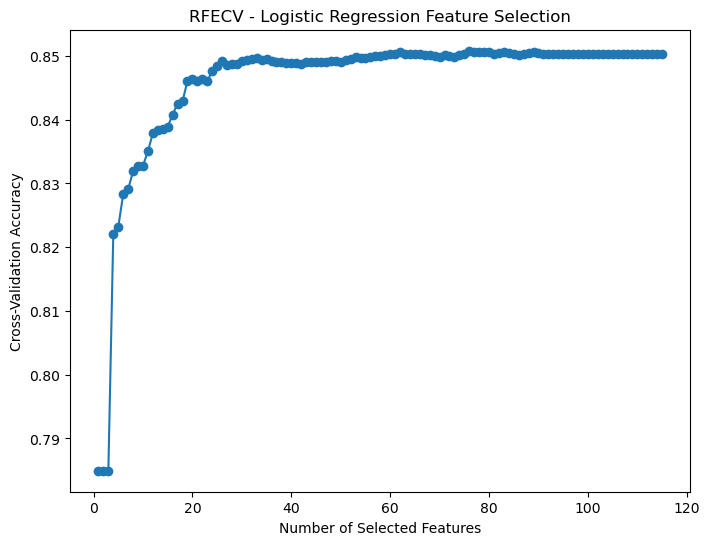

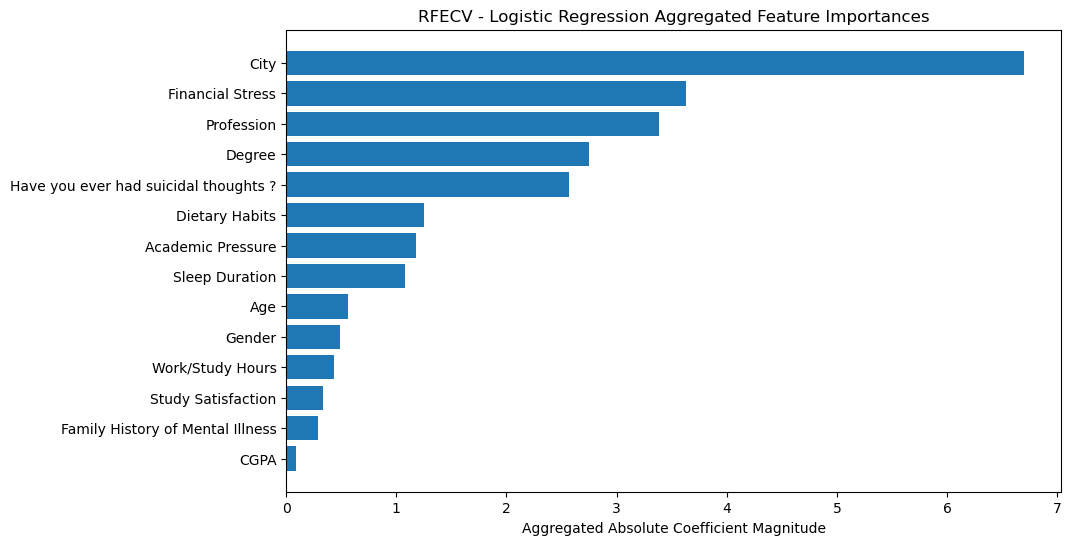

Optimal number of features selected: 76

Selected features (aggregated for categorical variables):
City
Financial Stress
Profession
Degree
Have you ever had suicidal thoughts ?
Dietary Habits
Academic Pressure
Sleep Duration
Age
Gender
Work/Study Hours
Study Satisfaction
Family History of Mental Illness
CGPA


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

# ----------------------
# Step 1: Encode features using the best preprocessor
# ----------------------
preprocessor = grid_search.best_estimator_.named_steps['preprocess']
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# ----------------------
# Step 2: Get encoded feature names (aligned exactly with transformed matrix)
# ----------------------
categorical_cols = X.select_dtypes(include=['category', 'object']).columns
numeric_cols = X.select_dtypes(exclude=['category', 'object']).columns

encoded_cat_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)
all_feature_names = np.concatenate([encoded_cat_names, numeric_cols])

# 🔹 Ensure alignment
if X_train_encoded.shape[1] != len(all_feature_names):
    print(f"⚠️ Adjusting feature names: {len(all_feature_names)} → {X_train_encoded.shape[1]}")
    all_feature_names = all_feature_names[:X_train_encoded.shape[1]]

# ----------------------
# Step 3: RFECV with Logistic Regression (best estimator)
# ----------------------
best_logreg = grid_search.best_estimator_.named_steps['logreg']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
rfecv = RFECV(
    estimator=best_logreg,
    step=1,
    cv=cv,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rfecv.fit(X_train_encoded, y_train)

# ----------------------
# Step 4: Plot number of features vs CV score
# ----------------------
plt.figure(figsize=(8,6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1),
         rfecv.cv_results_['mean_test_score'], marker='o')
plt.xlabel("Number of Selected Features")
plt.ylabel("Cross-Validation Accuracy")
plt.title("RFECV - Logistic Regression Feature Selection")
plt.show()

# ----------------------
# Step 5: Identify selected features
# ----------------------
selected_mask = rfecv.support_

# ✅ Safe slice with length match
selected_features = np.array(all_feature_names)[:len(selected_mask)][selected_mask]

# ----------------------
# Step 6: Coefficient-based importance
# ----------------------
coefficients = rfecv.estimator_.coef_[0]

feature_importance_dict = {}
for name, coef in zip(selected_features, coefficients):
    base_name = name.split('_')[0] if '_' in name and name.split('_')[0] in categorical_cols else name
    feature_importance_dict[base_name] = feature_importance_dict.get(base_name, 0) + abs(coef)

sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# ----------------------
# Step 7: Plot aggregated importance
# ----------------------
names = [x[0] for x in sorted_features]
values = [x[1] for x in sorted_features]

plt.figure(figsize=(10,6))
plt.barh(range(len(names)), values[::-1])
plt.yticks(range(len(names)), names[::-1])
plt.xlabel("Aggregated Absolute Coefficient Magnitude")
plt.title("RFECV - Logistic Regression Aggregated Feature Importances")
plt.show()

# ----------------------
# Step 8: Print results
# ----------------------
print("Optimal number of features selected:", rfecv.n_features_)
print("\nSelected features (aggregated for categorical variables):")
for f in names:
    print(f)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------
# Step 1: Select features using RFECV mask
# ----------------------
selected_features_mask = rfecv.support_
selected_features = all_feature_names[selected_features_mask]

# Reduce the encoded datasets
X_train_selected = X_train_encoded[:, selected_features_mask]
X_test_selected = X_test_encoded[:, selected_features_mask]

# ----------------------
# Step 2: Retrieve best logistic model from tuning
# ----------------------
best_logreg = grid_search.best_estimator_.named_steps['logreg']

# ----------------------
# Step 3: Refit logistic regression on reduced features
# ----------------------
best_logreg.fit(X_train_selected, y_train)

# ----------------------
# Step 4: Predictions
# ----------------------
y_train_pred_reduced = best_logreg.predict(X_train_selected)
y_test_pred_reduced = best_logreg.predict(X_test_selected)

# ----------------------
# Step 5: Evaluate performance
# ----------------------
print("\nTraining Classification Report:")
print(classification_report(y_train, y_train_pred_reduced))

print("Testing Classification Report:")
print(classification_report(y_test, y_test_pred_reduced))

# ----------------------
# Step 6: Optional - Accuracy and confusion matrix
# ----------------------
print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred_reduced):.4f}")
print(f"Testing Accuracy:  {accuracy_score(y_test, y_test_pred_reduced):.4f}")

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, y_test_pred_reduced))


Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      9222
           1       0.86      0.89      0.88     13098

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320

Testing Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581

Training Accuracy: 0.8522
Testing Accuracy:  0.8391

Confusion Matrix (Test Data):
[[1848  495]
 [ 403 2835]]


### Retune the reduced model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ----------------------
# Step 1: Model definition
# ----------------------
logreg_reduced = grid_search.best_estimator_.named_steps['logreg']

# Hyperparameter grid (adjust as needed)
param_grid_reduced = {
    "penalty": ["l2"], 
    "C": [0.01, 0.1, 1, 10, 100],
    "solver": ["lbfgs", "saga", 'liblinear']
}

# ----------------------
# Step 2: Grid Search on selected features
# ----------------------
grid_search_reduced = GridSearchCV(
    estimator=logreg_reduced,
    param_grid=param_grid_reduced,
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1
)

grid_search_reduced.fit(X_train_selected, y_train)

print("\nBest Parameters (Reduced Features):")
print(grid_search_reduced.best_params_)

# Retrieve best tuned model
best_logreg_reduced = grid_search_reduced.best_estimator_

# ----------------------
# Step 3: Predictions after tuning
# ----------------------
y_train_pred_best = best_logreg_reduced.predict(X_train_selected)
y_test_pred_best = best_logreg_reduced.predict(X_test_selected)

# ----------------------
# Step 4: Classification Reports
# ----------------------
print("\nTraining Classification Report (Tuned):")
print(classification_report(y_train, y_train_pred_best))

print("\nTesting Classification Report (Tuned):")
print(classification_report(y_test, y_test_pred_best))

# ----------------------
# Step 5: Accuracy and Confusion Matrix
# ----------------------
print(f"\nTraining Accuracy (Tuned): {accuracy_score(y_train, y_train_pred_best):.4f}")
print(f"Testing Accuracy (Tuned):  {accuracy_score(y_test, y_test_pred_best):.4f}")

print("\nConfusion Matrix (Test Data - Tuned):")
print(confusion_matrix(y_test, y_test_pred_best))

Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters (Reduced Features):
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

Training Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.84      0.80      0.82      9222
           1       0.86      0.89      0.88     13098

    accuracy                           0.85     22320
   macro avg       0.85      0.84      0.85     22320
weighted avg       0.85      0.85      0.85     22320


Testing Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2343
           1       0.85      0.88      0.86      3238

    accuracy                           0.84      5581
   macro avg       0.84      0.83      0.83      5581
weighted avg       0.84      0.84      0.84      5581


Training Accuracy (Tuned): 0.8522
Testing Accuracy (Tuned):  0.8391

Confusion Matrix (Test Data - Tuned):
[[1848  49